# Categorical feature encoding challenge II- Unsupervised

In this task we will do unsupervised machine learning technique where we will find out labels from testing data by using unsupervised algorithm Kmeans, PCA, Agglomerative, Gausian mix. 

# Importing important libraries for this task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,ward
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score,adjusted_rand_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics.cluster import adjusted_mutual_info_score,adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.mixture import GaussianMixture

# Loading both train and test data

In [43]:
def load_data_unbalanced(input_=[r'C:\Users\mamun\OneDrive\Desktop\integrify/train.csv',r'C:\Users\mamun\OneDrive\Desktop\integrify/test.csv'],
             sample_f=0.05):
    train=pd.read_csv(input_[0])
    
    if sample_f!=0:
        train=train.sample(frac=sample_f)
        
    train.loc[:, train.columns != 'id'] = train.loc[:, train.columns != 'id']\
            .astype('category').apply(lambda x: x.cat.codes)
    train.drop(['id'],axis=1,inplace=True)
    
    train_x=train.drop('target',axis=1)
    train_y=train['target']
    
  
    
    return(train_x,train_y)

In [44]:
train_x,train_y=load_data_unbalanced()

In [45]:
train_x.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
280025,0,0,1,1,1,0,2,0,5,1,...,61,1965,0,2,4,14,24,60,2,2
289242,0,0,0,0,1,2,5,2,5,0,...,88,1285,2,3,2,13,15,124,1,4
525884,0,0,0,0,1,0,4,3,3,0,...,92,869,0,1,0,8,19,-1,2,7
114912,0,0,1,1,1,1,0,2,2,3,...,103,356,2,3,3,2,2,124,1,2
3690,0,0,1,0,0,2,1,1,2,0,...,178,793,0,2,0,7,1,114,2,1


In [46]:
train_y.value_counts()

0    24440
1     5560
Name: target, dtype: int64

# Loading test data only 10% sample of the whole data

In [47]:
def load_test(data,sample_=0.10):
    if sample_!=0:
        data=data.sample(frac=sample_)
    
    data.loc[:, data.columns != 'id'] = data.loc[:, data.columns != 'id']\
            .astype('category').apply(lambda x: x.cat.codes)
    data.drop(['id'],axis=1,inplace=True)
    
    return(data)

In [48]:
## loading the test data

data=pd.read_csv(r'C:\Users\mamun\OneDrive\Desktop\integrify/test.csv')

test_data=load_test(data)

In [49]:
test_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
142473,0,0,-1,0,1,0,4,3,3,0,...,3,831,1,3,0,13,20,180,0,4
340277,0,0,1,0,1,0,5,4,4,0,...,2,652,2,-1,2,0,15,97,2,4
34802,0,-1,0,1,1,2,5,0,2,3,...,46,1144,1,1,5,0,17,75,2,2
107775,0,0,1,1,0,2,1,3,3,0,...,106,410,1,3,5,0,3,71,4,0
9036,0,0,0,1,0,0,0,3,4,1,...,213,1462,0,3,2,7,23,117,5,7


In [50]:
train_x.nom_5.value_counts()

-1       873
 1122     65
 128      61
 826      60
 177      57
        ... 
 463       1
 282       1
 511       1
 315       1
 988       1
Name: nom_5, Length: 1198, dtype: int64

In [51]:
# Drop the columns that have nop significant values
train_x=train_x.drop(columns=['nom_5','nom_6','nom_7','nom_8','nom_9','ord_5'],axis=1)

In [53]:
train_x.ord_4.value_counts()[:10]

13    2029
24    1881
15    1845
0     1820
17    1714
12    1634
23    1629
2     1627
20    1617
7     1535
Name: ord_4, dtype: int64

# Application of Kmeans

In [54]:
# first we are applying the kmeans in train data. 
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(train_x) for k in range(1,20)]

inertia=[model.inertia_ for model in kmeans_per_k]

In [55]:
silh_score=[silhouette_score(train_x,model.labels_)for model in kmeans_per_k[1:]]

In [56]:
silh_score

[0.31643857541702325,
 0.24899752417375517,
 0.20959293454910552,
 0.19305282594028927,
 0.17988856635493455,
 0.17526141758189984,
 0.1585089857163959,
 0.14974644852186694,
 0.13800298072237904,
 0.13230481263290425,
 0.13059642596854662,
 0.12731217631541505,
 0.12351532840815929,
 0.1228957924760128,
 0.11998559634139278,
 0.11932871613165656,
 0.11790680949036568,
 0.11526534828396082]

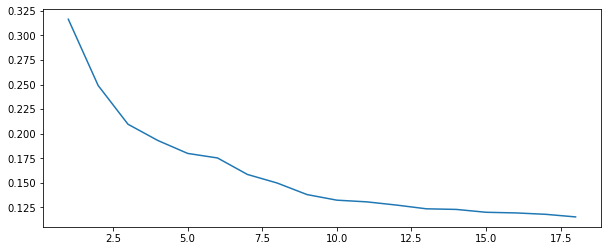

In [59]:
plt.figure(figsize=(10,4))
plt.plot(range(1,19),silh_score)

In [60]:
kmeans1=KMeans(n_clusters=8,random_state=42).fit(train_x)


In [61]:
kmeans1.predict(train_x)

array([6, 1, 6, ..., 6, 2, 3])

In [62]:
kmeans1.labels_

array([6, 1, 6, ..., 6, 2, 3])

In [63]:
homogeneity_completeness_v_measure(train_y,kmeans1.predict(train_x))

(0.04117262497053454, 0.009536039350296338, 0.015485470861149186)

In [64]:
adjusted_rand_score(train_y,kmeans1.predict(train_x))

0.0008560574047491132

In [65]:
silhouette_score(train_x,kmeans1.labels_)

0.1585089857163959

## Scaling of data

In [66]:
scaler=StandardScaler()
scaled=scaler.fit_transform(train_x)

In [67]:
scaled

array([[-0.17521381, -0.34308253,  1.54444865, ...,  1.54873738,
        -0.47551781, -0.88678561],
       [-0.17521381, -0.34308253, -0.49739251, ...,  0.39019976,
        -0.94682528, -0.3271935 ],
       [-0.17521381, -0.34308253, -0.49739251, ...,  0.90510537,
        -0.47551781,  0.51219465],
       ...,
       [-0.17521381,  1.96983342, -0.49739251, ...,  1.03383177,
         0.93840459, -1.44637771],
       [-0.17521381,  1.96983342, -0.49739251, ...,  1.54873738,
        -1.88944021, -1.44637771],
       [-3.1415875 , -0.34308253,  1.54444865, ..., -0.63961146,
         1.40971205, -0.04739745]])

In [68]:
km_scaled=KMeans(n_clusters=8,random_state=42).fit(scaled)

In [69]:
silhouette_score(scaled,km_scaled.labels_)

0.03925105325123783

In [70]:
adjusted_rand_score(train_y,km_scaled.predict(scaled))

-0.0024725242760058655

In [71]:
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(scaled) for k in range(1,20)]

inertia=[model.inertia_ for model in kmeans_per_k]

In [72]:
silh_score=[silhouette_score(scaled,model.labels_)for model in kmeans_per_k[1:]]

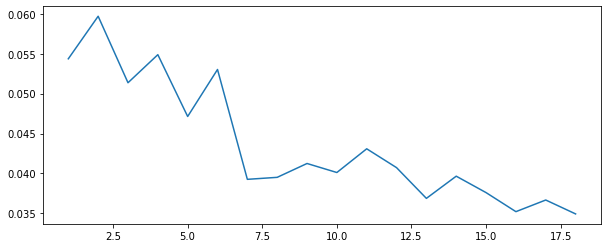

In [74]:
plt.figure(figsize=(10,4))
plt.plot(range(1,19),silh_score)

In [75]:
km_scaled_=KMeans(n_clusters=3,random_state=42).fit(scaled)

In [76]:
silhouette_score(scaled,km_scaled_.labels_)

0.05970739885490232

In [77]:
adjusted_rand_score(train_y,km_scaled_.predict(scaled))

0.0003096776192606158

## without removing the columns

In [78]:
x,y=load_data_unbalanced()

In [79]:
scaled_x=scaler.fit_transform(x)

In [80]:
km_scaled_x =KMeans(n_clusters=2,random_state=0).fit(scaled_x)

In [81]:
silhouette_score(scaled_x,km_scaled_x.labels_)

0.03946549423052154

In [82]:
adjusted_rand_score(train_y,km_scaled_x.predict(scaled_x))

-2.77823245861966e-05

## Agglomerative

In [83]:
agg=AgglomerativeClustering(n_clusters=2).fit(scaled_x)

In [84]:
silhouette_score(scaled_x,agg.labels_)

0.0875362329705008

In [85]:
sum(agg.labels_!=train_y)

7206

In [86]:
agg=AgglomerativeClustering(n_clusters=2).fit(train_x)

In [87]:
silhouette_score(train_x,agg.labels_)

0.3136281122869895

## Gaussian mixture

### unscaled data

In [88]:
gm=GaussianMixture(n_components=2).fit(train_x)

In [89]:
gm.predict(train_x)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [90]:
silhouette_score(train_x,gm.predict(train_x))

0.30720633322801405

### scaled data

In [91]:
gm_=GaussianMixture(n_components=2).fit(scaled_x)

In [92]:
silhouette_score(scaled_x,gm_.predict(scaled_x))

0.033472828568706

## Dimensionality reduction

In [93]:
pca=PCA(n_components=2)
x_trans=pca.fit_transform(train_x)

In [94]:
kmeans_pca=KMeans(n_clusters=2,random_state=42).fit(x_trans)


In [95]:
silhouette_score(x_trans,kmeans_pca.labels_)

0.4653966735940366

In [96]:
c=kmeans_pca.predict(x_trans)
c

array([0, 0, 0, ..., 0, 0, 1])

In [97]:
homogeneity_completeness_v_measure(train_y,kmeans_pca.predict(x_trans))

(0.006759435749311923, 0.004796577163523191, 0.005611304763676921)

In [98]:
adjusted_rand_score(train_y,kmeans_pca.predict(x_trans))

-0.01078502832114828

### scaling data after dimension reduction

In [99]:
sc_pca=scaler.fit_transform(x_trans)

In [100]:
kmeans_pca=KMeans(n_clusters=2,random_state=42).fit(sc_pca)


In [101]:
silhouette_score(sc_pca,kmeans_pca.labels_)

0.38329785081161355

### aggegate after dimension reduction

In [102]:
agg1=AgglomerativeClustering(n_clusters=2).fit(x_trans)

In [103]:
silhouette_score(x_trans,agg1.labels_)

0.4421447672366202

### Visualize the klustered data

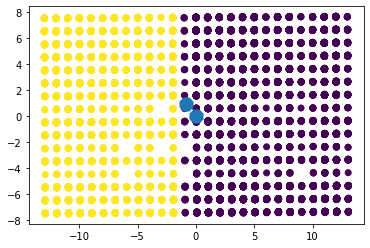

In [104]:
plt.scatter(x_trans[:,0],x_trans[:,1],c=c)

plt.scatter(kmeans_pca.cluster_centers_[0],kmeans_pca.cluster_centers_[1],marker="8",s=200)

# Application of kmeans on test data

In [107]:
pca=PCA(n_components=2)
x_trans=pca.fit_transform(train_x)

In [108]:
pipe=Pipeline([
    ('pca',PCA(n_components=2)),
    ('kmeans',KMeans(n_clusters=2,random_state=42))
])

In [109]:
pipe.fit(train_x)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [117]:
test_data=test_data.drop(columns=['nom_5','nom_6','nom_7','nom_8','nom_9','ord_5'],axis=1)

In [118]:
predict_=pipe.predict(test_data)

In [119]:
predict_

array([0, 0, 0, ..., 1, 0, 1])

In [120]:
silhouette_score(test_data,predict_)

0.31572580943216255

# Conclusion
After using several unsupervised technique on test data we have found silhouette_score is the best algorithm for classification of two clusters. Because it gave us highest accuracy score on test data.